In [1]:
# Calculating the approximation ratio by comparing the approximation algorithm to the greedy, specified on a networkx approximation algorithm for cliques.
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import random as rnd
import pandas as pd
import numpy as np

In [2]:
# Function which generates a random number n and a random number between 0 and 1 p, and returns a random graph with n nodes and probability p
def random_graph(n, p):
    return nx.gnp_random_graph(n, p)

In [3]:
# Function which uses the greedy algorithm to return the maximum clique of a graph
def greedy(graph):
    cliques = nx.find_cliques(graph)
    max_clique = 0
    for clique in cliques:
        if len(clique) > max_clique:
            max_clique = len(clique)
    return max_clique

In [4]:
# Function which uses the approximation algorithm to return the maximum clique of a graph
def approx(graph):
    return nx.algorithms.approximation.clique.max_clique(graph)

In [5]:
# Function which returns the approximation ratio of the approximation algorithm to the greedy algorithm
def approx_ratio(graph):
    return len(approx(graph))/greedy(graph)

In [6]:
# Function which receives a list of values of n, and a list of approximation ratio of the approximation algorithm to the greedy algorithm and draws a graph of the approximation ratio as a function of n
def draw_a_graph_of_approx_ratio_as_a_function_of_n(n_list, ratio):
    plt.plot(n_list, ratio, 'bo')
    plt.xlabel('n')
    plt.ylabel('Approximation ratio')
    plt.show()

In [7]:
# Function which receives a list of list of values of n, list of lists of values of p and a list of lists of approximation ratio and calculates an approximate 3D plane that fits the data points and draws it.
def draw_a_3D_graph_of_approx_ratio_as_a_function_of_n_and_p(n_list, p_list, ratio):
    df = pd.DataFrame()
    for i in range(len(n_list)):
        df = pd.concat(
            [df, pd.DataFrame({'n': n_list[i], 'p': p_list[i], 'ratio': ratio[i]})])
    fig = px.scatter_3d(df, x='n', y='p', z='ratio', opacity=0.7)
    fig.show()

In [8]:
# Function which returns the average approximation ratio of the approximation algorithm to the greedy algorithm for a range of values of n and p
def check():
    nlist = []
    plist = []
    r = []
    for index in range(1, 11):
        n_list = []
        p_list = []
        ratio = []
        p = rnd.uniform(0.1*(index-1), 0.1*index)
        for n in range(1, 59):
            n_list.append(n)
            graph = random_graph(n, p)
            p_list.append(p)
            ratio.append(approx_ratio(graph))
        print("p =", p)
        draw_a_graph_of_approx_ratio_as_a_function_of_n(n_list, ratio)
        nlist.append(n_list)
        plist.append(p_list)
        r.append(ratio)
    draw_a_3D_graph_of_approx_ratio_as_a_function_of_n_and_p(nlist, plist, r)

p = 0.04835889514066129


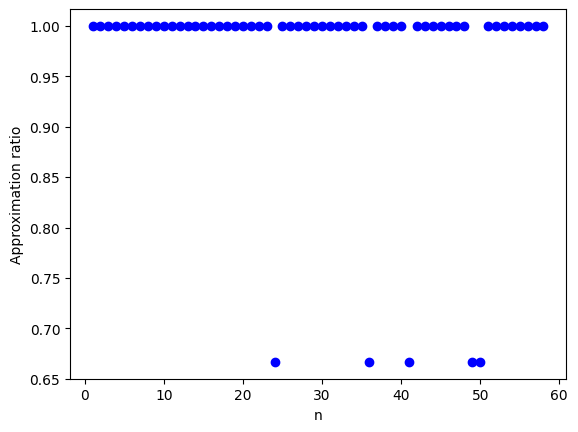

p = 0.1433800266546813


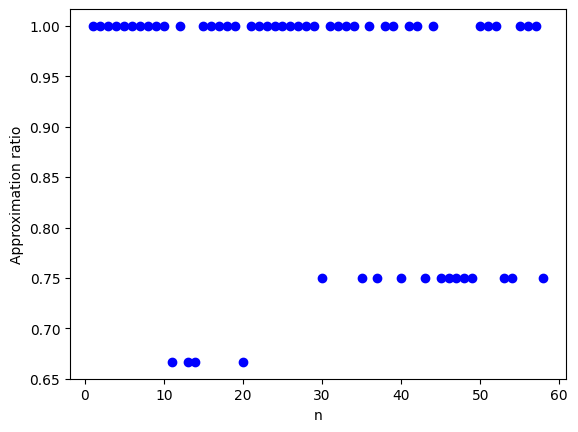

p = 0.28621313054188974


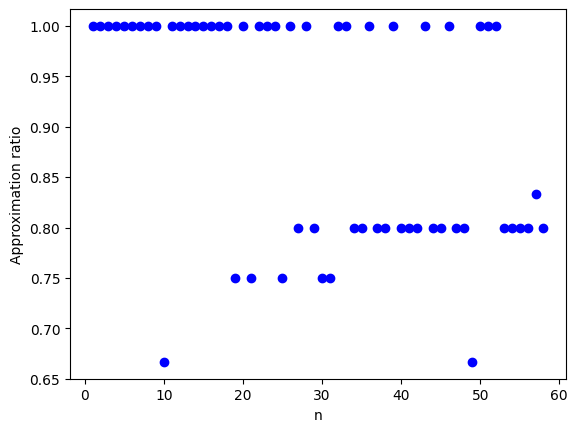

p = 0.3531399999872341


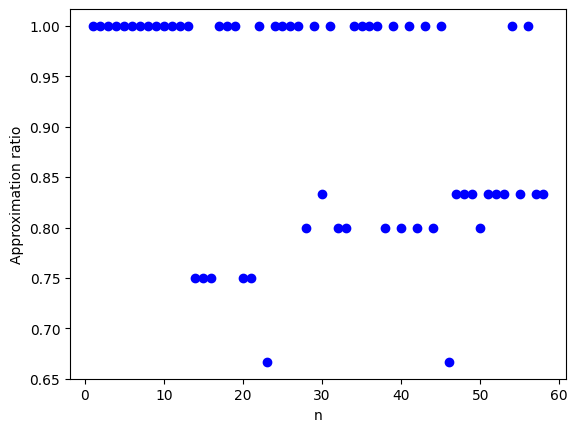

p = 0.43391634116004585


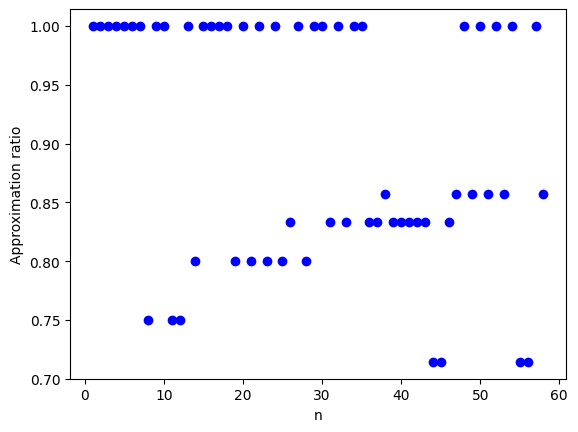

p = 0.5854712923820454


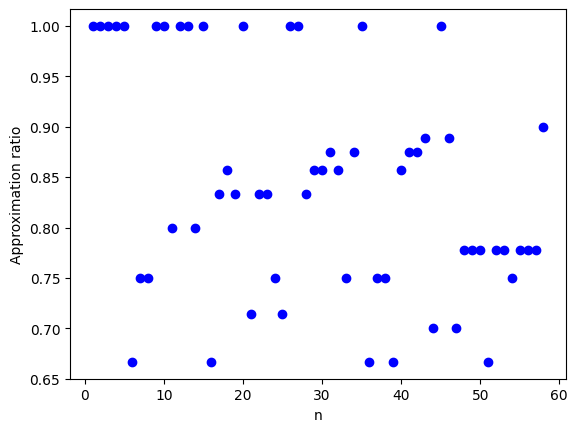

p = 0.6772447228603248


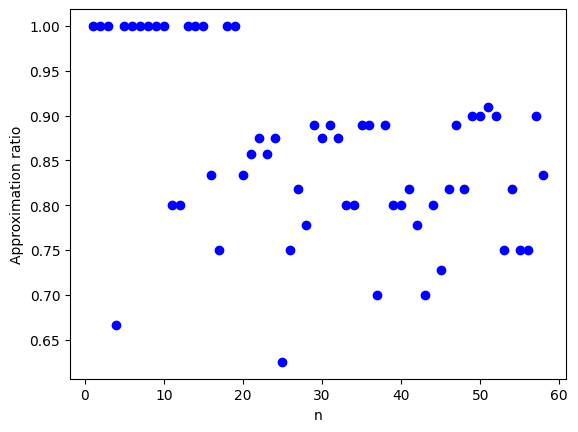

p = 0.7733789553052703


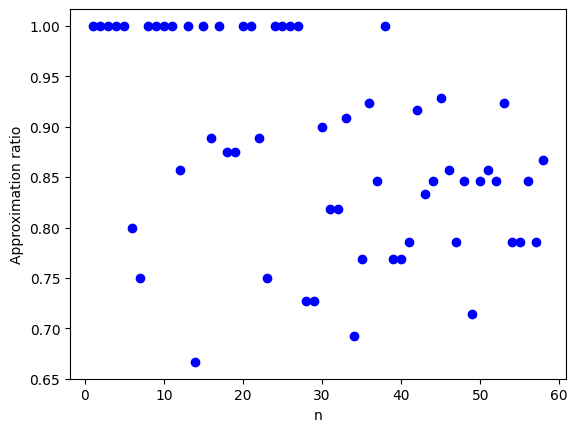

p = 0.8538213151336932


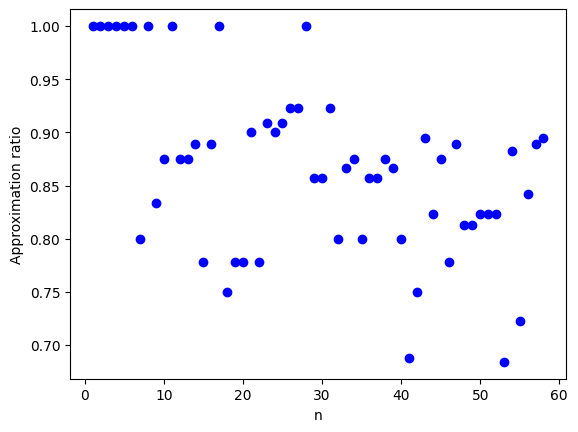

p = 0.9899742366427321


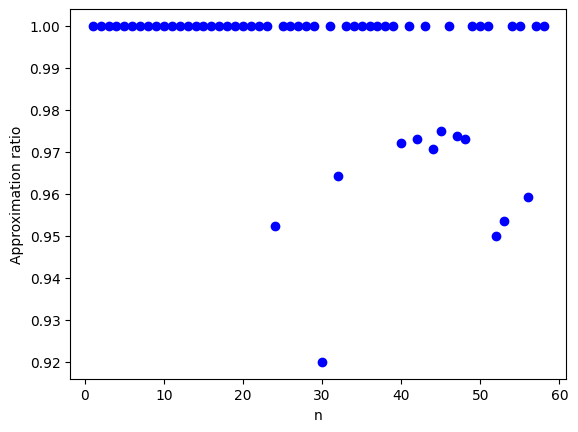

In [9]:
check()

![newplot.png](/newplot.png)